In [46]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
import sys
sys.path.insert(0,'../..')
import kaggle_explorer as K
import pydicom
from pydicom.pixel_data_handlers.util import apply_modality_lut
from skimage.transform import resize


In [72]:
reference_dicom = pydicom.dcmread("DXm.2.25.119403010146292111130118207990186551199.dcm")
source_dicom = pydicom.dcmread("1459541791.dcm")

In [73]:
transfer_syntax = reference_dicom.file_meta.TransferSyntaxUID

In [74]:
pixel_array = source_dicom.pixel_array

In [75]:
new_dicom = pydicom.dataset.Dataset()
new_dicom.update(reference_dicom)

In [76]:
new_dicom.PixelData = pixel_array.tobytes()

In [77]:
new_dicom.is_little_endian = reference_dicom.is_little_endian
new_dicom.is_implicit_VR = reference_dicom.is_implicit_VR

In [78]:
file_meta = pydicom.dataset.FileMetaDataset()
file_meta.TransferSyntaxUID = transfer_syntax
new_dicom.file_meta = file_meta

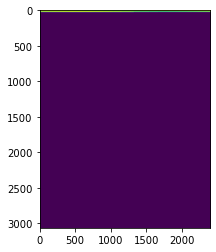

In [79]:
plt.imshow(new_dicom.pixel_array)

In [80]:
min_pixel_value = reference_dicom.pixel_array.min()
max_pixel_value = reference_dicom.pixel_array.max()

In [81]:
pixel_array = source_dicom.pixel_array

In [82]:
normalized_pixels = (pixel_array - np.min(pixel_array)) / np.ptp(pixel_array)


In [83]:
rescaled_pixels = (normalized_pixels * (max_pixel_value - min_pixel_value)) + min_pixel_value


In [84]:
new_dicom = pydicom.dataset.Dataset()
new_dicom.update(reference_dicom)

In [85]:
new_dicom.PixelData = rescaled_pixels.tobytes()

In [86]:
new_dicom.is_little_endian = reference_dicom.is_little_endian
new_dicom.is_implicit_VR = reference_dicom.is_implicit_VR

In [87]:
file_meta = pydicom.dataset.FileMetaDataset()
file_meta.TransferSyntaxUID = transfer_syntax
new_dicom.file_meta = file_meta

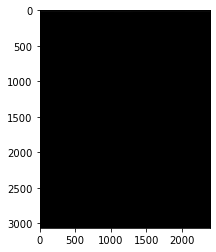

In [88]:
plt.imshow(new_dicom.pixel_array, cmap = 'gray')

In [89]:
min_pixel_value = reference_dicom.pixel_array.min()
max_pixel_value = reference_dicom.pixel_array.max()

In [90]:
if "PixelSpacing" in reference_dicom:
    pixel_spacing = reference_dicom.PixelSpacing
else:
    if "SpacingBetweenSlices" in reference_dicom:
        spacing_between_slices = reference_dicom.SpacingBetweenSlices
        pixel_spacing = [reference_dicom.SliceThickness] + [spacing_between_slices]
    else:
        pixel_spacing = [1.0, 1.0]


In [91]:
if "ImagePositionPatient" in reference_dicom:
    image_position = reference_dicom.ImagePositionPatient
else:
    image_position = [0.0, 0.0, 0.0]

In [92]:
pixel_array = source_dicom.pixel_array

In [93]:
normalized_pixels = (pixel_array - np.min(pixel_array)) / np.ptp(pixel_array)
rescaled_pixels = (normalized_pixels * (max_pixel_value - min_pixel_value)) + min_pixel_value

new_dicom = pydicom.dataset.Dataset()
new_dicom.update(reference_dicom)

new_dicom.PixelData = rescaled_pixels.tobytes()

new_dicom.is_little_endian = reference_dicom.is_little_endian
new_dicom.is_implicit_VR = reference_dicom.is_implicit_VR

file_meta = pydicom.dataset.FileMetaDataset()
file_meta.TransferSyntaxUID = transfer_syntax
new_dicom.file_meta = file_meta

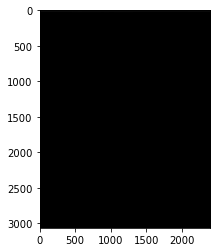

In [94]:
plt.imshow(new_dicom.pixel_array, cmap = 'gray')

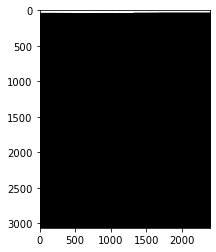

In [103]:
plt.imshow(new_dicom.pixel_array, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.show()